### Anomaly Detection

In this exercise, we will use algorithmic and statistical methods for anomaly detection. We will start with the Local Outlier Factor (LOF) algorithm using data generated with sklearn. Next, we'll use boxplot and histogram analysis, and we'll calculate the lower and upper bounds using quartiles in a California housing database, available at the sklearn library.

This exercise is based on the example taken from the article Anomaly Detection Example with Local Outlier Factor in Python (https://www.datatechnotes.com/2020/04/anomaly-detection-with-local-outlier-factor-in-python.html ) by Otabek Yorkinov, DataTechNotes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor # use the local outlier factor algorithm and to get dataset blobs
from sklearn.datasets import make_blobs # returns data and labels
plt.rcParams["figure.figsize"] = (15,10)  

In [2]:
data, labels = make_blobs(n_samples = 200, centers = 1, n_features = 2, random_state = 0, center_box = (10, 10), cluster_std = .3)

In [3]:
data[:10]

array([[10.01372756,  9.94384484],
       [ 9.6188545 , 10.29081901],
       [ 9.88453606, 10.02830548],
       [ 9.84710435,  9.86857771],
       [ 9.81157373,  9.85569186],
       [ 9.96903434, 10.12317955],
       [ 9.74163229, 10.57301949],
       [10.01158917,  9.50298547],
       [10.23153717, 10.24705125],
       [10.04648423, 10.11344876]])

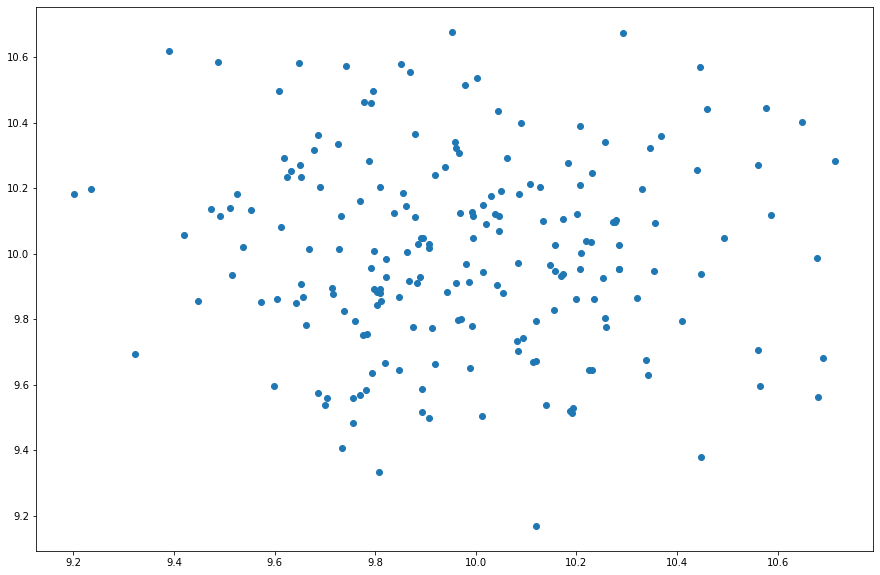

In [4]:
# Distribution of data generated by make blobs
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [5]:
# Neighbor numbers and contamination to define the proportion of dataset anomalies
k_neighbors = 20
contamination = .03
lof = LocalOutlierFactor(n_neighbors=k_neighbors, contamination=contamination)

In [6]:
# Prediction
prediction = lof.fit_predict(data)

In [8]:
prediction

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [9]:
lof_index = np.where(prediction == -1) # -1 = anomalies
anomalies = data[lof_index]

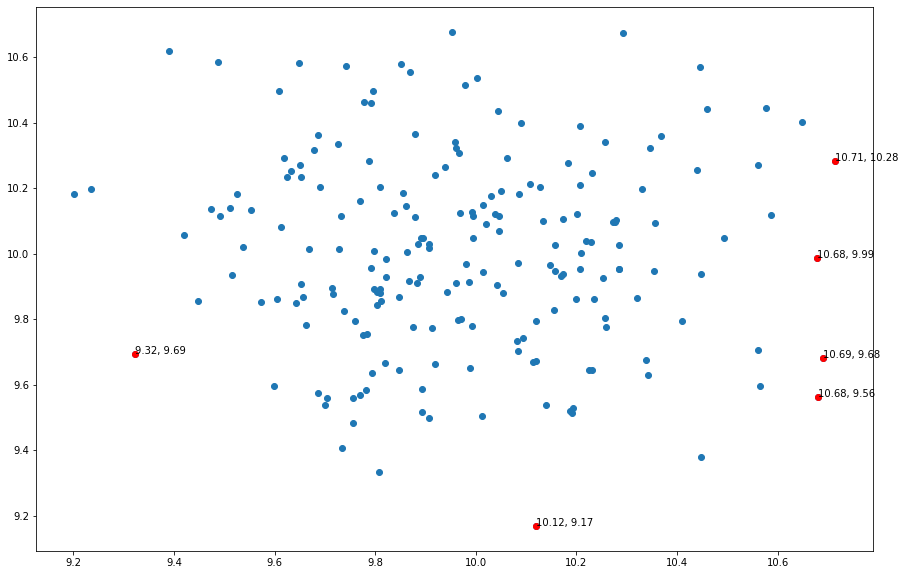

In [11]:
fig, axis = plt.subplots()
axis.scatter(data[:, 0], data[:, 1]) # x and y
axis.scatter(anomalies[:,0], anomalies[:, 1], color = 'red') # anomalies

# anomalies coordinates
for i, text in enumerate(anomalies): 
  axis.annotate('{:.2f}'.format(text[0]) + ', '+'{:.2f}'.format(text[1]), (anomalies[i,0], anomalies[i,1]))
plt.show()

In [12]:
# 6 anomalies out of space, so the outlier local algorithm was useful in data classification.

### Statistical Methods

We are going to do anomaly detection using statistical methods like box plot, histogram analysis and lower and upper limits calculation using quartiles.

For this analysis we are going to use a California housing dataset and **pandas** to visualize the box plots. The **plotly** library will be used to also visualize an example histogram analysis along with the box plot.

This exercise was based on the example taken from the article [5 Easy Ways to Detect Outliers in Python](https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/) by Marc Bolle , Data Science 
Sphere.

California Census 1990 and the **plotly** library.
This database has the following attributes:
* **MedInc**: Median block income
* **HouseAge**: Median age of household
* **AveRooms**: Average rooms per household
* **AveBedrms**: Average rooms per residence
* **Population**: Residents of the block
* **AveOccup**: Average number of residents per household
* **Latitude** 
* **Longitude** 

In [14]:
from sklearn.datasets import fetch_california_housing
import plotly.express as pe

In [15]:
data_california = fetch_california_housing(as_frame=True)
residence = data_california.data
residence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


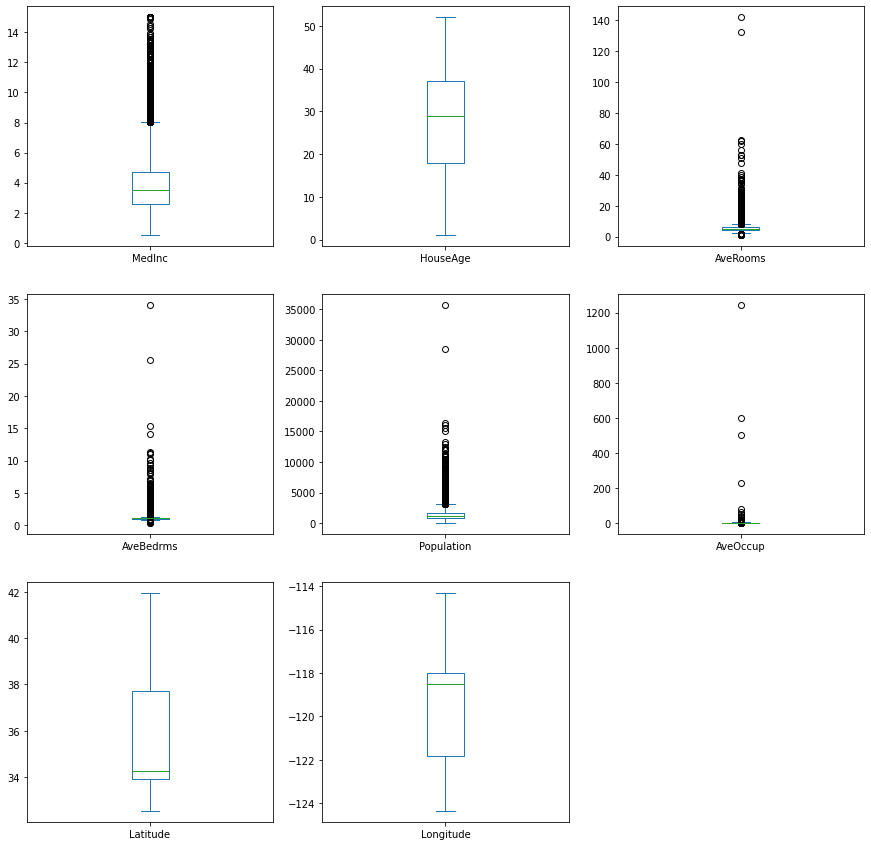

In [16]:
residence.plot(kind='box', subplots = True, layout = (3,3), figsize = (15, 15))
plt.show()

In [18]:
# Average Income
fig_income = pe.histogram(residence, x = 'MedInc', marginal = 'box')
fig_income.show()

In [20]:
# Average rooms
fig_rooms = pe.histogram(residence, x = 'AveRooms', marginal = 'box')
fig_rooms.show()

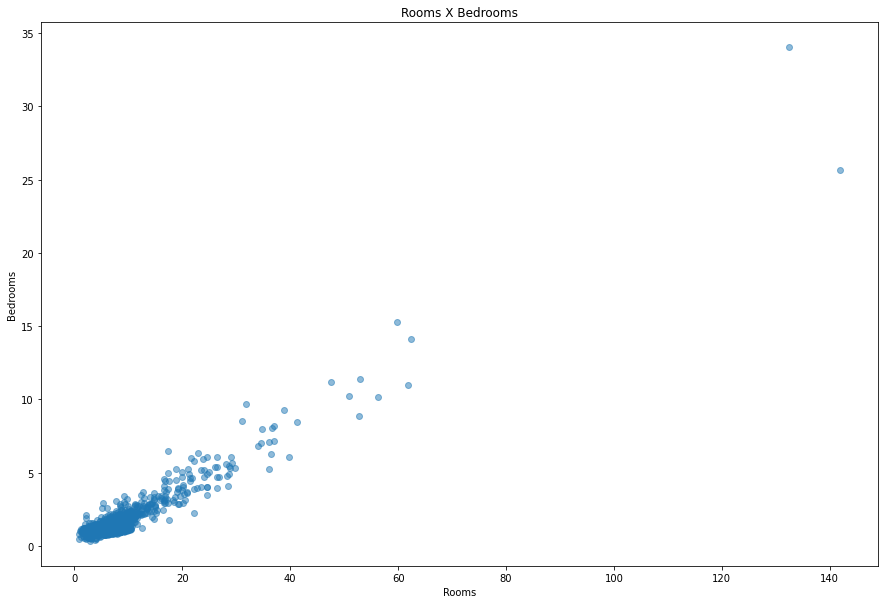

In [22]:
# Scatterplot Average Rooms X Average Bedrooms
plt.scatter(residence['AveRooms'], residence['AveBedrms'], alpha = 0.5)
plt.xlabel('Rooms')
plt.ylabel('Bedrooms')
plt.title('Rooms X Bedrooms')
plt.show()

In [23]:
population = residence['Population']
population.head()

0     322.0
1    2401.0
2     496.0
3     558.0
4     565.0
Name: Population, dtype: float64

In [24]:
# Quartiles 1 and 3 and Interquartile Range
quartile1 = residence['Population'].quantile(0.25)
quartile3 = residence['Population'].quantile(0.75)
range_interquartile = quartile3 - quartile1
print('Q1: {}, Q3: {} and RI: {}'.format(quartile1, quartile3, range_interquartile))

Q1: 787.0, Q3: 1725.0 and RI: 938.0


In [25]:
# Upper and lower limits
sigma = 1.5
lower_limit = quartile1 - (range_interquartile * sigma)
upper_limit = quartile3 + (range_interquartile * sigma)
print('Lower limit: {}, Upper limit: {}'.format(lower_limit, upper_limit))

Lower limit: -620.0, Upper limit: 3132.0


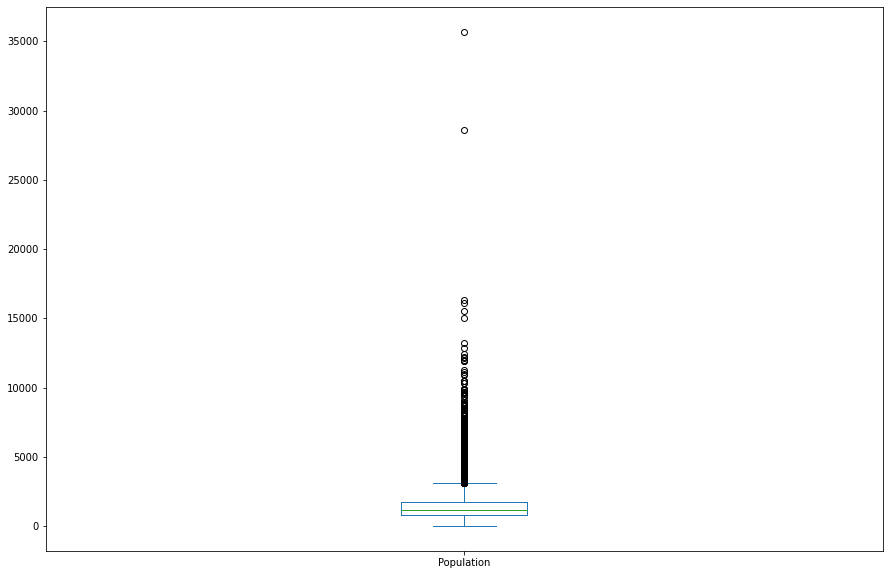

In [26]:
residence['Population'].plot(kind='box')
plt.show()

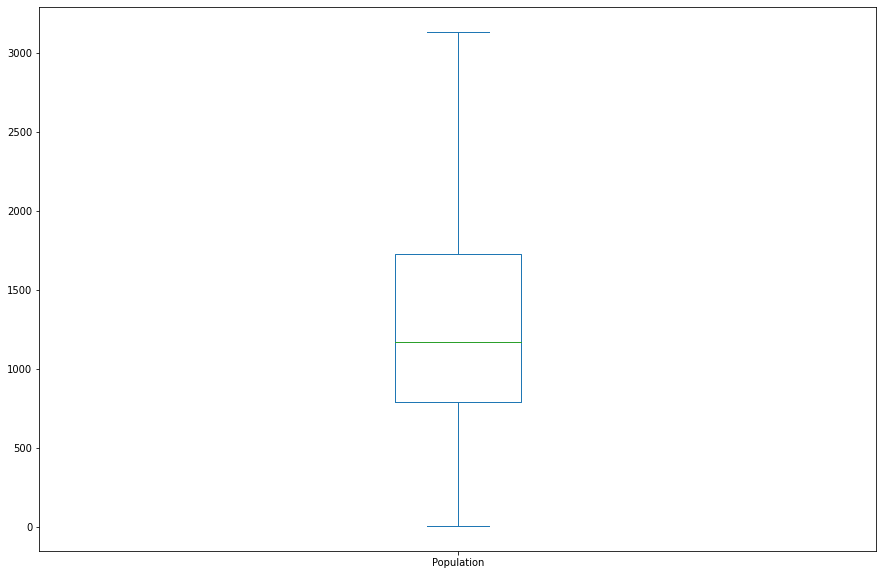

In [29]:
# No outliers
residence['Population'].plot(kind='box', showfliers = False)
plt.show()